
# CS51 Assignment 2: Algorithms and Simulation

This assignment has two distinct parts in addition to a reflection: Part 1 allows you to practice your algorithmic thinking skills and Part 2 allows you to gain a deeper understanding of numerical simulations. Material relevant for Part 1 will be covered during CS51 weeks 3-5 (especially session 5.2), while material relevant for Part 2 will be covered during weeks 6 and 7 (especially session 7.1). 

This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously.


<div class='alert alert-block alert-success'>
<b> <font size='6'>Starting of Part 1</font> </b>
</div>

## Part 1: Genetic Regression Algorithm  

This portion of the assignment checks your understanding of Python code and algorithmic thinking. Your notebook contains a set of very poorly documented python functions. These functions attempt to use a genetic algorithm to find the regression line for a dataset by looking for the two coefficients of the line. For each function, you’ll write comments explaining what the function does step-by-step, and the roles they play in the genetic algorithm. You will have to spend a considerable amount of time playing with the code! Check out the Python tips section for helpful strategies.

### 1. Function Description [#algorithms, optimization]

#### 1.1 For each of the functions **A to E**, add in-line comments to explain what the code is doing line-by-line. In addition to in-line comments, write a few sentences that address the following points. (50-100 words per annotation).

* Identify the aspect of a genetic algorithm that the function pertains to and explain why this aspect is important for optimization.  

* Describe how the function accomplishes its task.  

* Specify the inputs, outputs, and any major data structures involved.  


#### 1.2 Missing function: Function F currently does nothing. Use a process of elimination to determine, then describe, which common element of a genetic algorithm is missing from this program and could become F. Detail why this element of the algorithm is important for finding an optimal solution. Then, fill in function F with working code that accomplishes this task and explain how it works.

#### 1.3 Be sure to also consider the “main program” portion of the code. Add comments and explain what this part does and how it connects to the functions.

### <i>Data Loading and Parameter Initialization</i>

In [1]:
# Genetic algorithm to fit a regression line of the form y=ax+b to a 2-variable dataset
# importing necessary library
import random 
import numpy as np
import matplotlib.pyplot as plt                          

# load the data and store in a numpy array
my_data_file = 'temp_data.npy'
data = np.load(my_data_file)

# parameters
initial_pop_size = 1000 
mutation_rate = 0.30
num_generations = 10 
chromosome_length = 2
num_survivors = 200

### <i>Population Initialization</i>

In [2]:
#initiating initial population
def A():
    #creating a large population of possible value of a and b using linspace function
    #which crates 5000 equal space values between -1 and 80 inclusively
    gene_pool = np.linspace(-1,80,num = 5000)
    
    #Determining the dimension of our initial population where each element of the population
    #is one posible pair of our solution (a,b)
    dimensions = (initial_pop_size, chromosome_length)
    
    #randomly select our initial solution population, where each element is a pair of (a,b)
    #from the large population of numbers without replacing a number after choosing
    return np.random.choice(gene_pool, size=dimensions, replace=False)

- This function initializes a new population by random selection from 5000 equal spaced numbers between -1 and 80. Having such a large population to choose from allows us to have enough variance in the first generations.
- It creates 5000 equal spaced number between -1 and 80 and then from this population randomly select our first generation according to the given parameter size without any repetition.
- It takes no input and outputs a 2D (m x n) array where m is the number of candidate solution and n is the element in a single candidate solution.
- Each candidate solution consists of 2 element, a and b: the slope and the intercept respectively.

### <i>Fitness Function</i>

In [3]:
#calculating the fitness value, which is here the variance, the mean squared sum of error, SSE/n
#which take input one of our possible solution pair (a,b) and outputs the SSE/n
def B(coefficients):
    k = len(data) # the total number of data points
    tot = 0 #creating a variable to store the SSE
    for j in range(k): # for each pair of our given dataset
        #calculating the predicted value of y for x of the each pair
        y = coefficients[0] * data[j,0] + coefficients[1]
        #calculating the residual, the difference between the observed y value given in the dataset
        #and predicted y value by the (ax+b) function, for each pair of data
        res = data[j,1] - y
        #adding the squared value of the residual
        #taking square so that positive-negative the error doesn't cancel each other
        tot += res**2
    #output the average of the squared sum of error
    return tot/k

- This function calculates the fitness value for each candidate solution. This fitness function allows us to determine the better candidate solutions and to select the survivors. 
- Using the slope and intercept value and x from the data set, it calculates the predicted y by the equation and measures its difference from the observed y value given in the dataset. Then it calculates the variance, the average squared sum of the error. As the fitness value is the error, so the less it is the better the candidate solution.
- As a fitness function, it takes input a candidate solution (here a array of 2 element) and returns its fitness value (here SSE/n).

### <i>Array of Fitness Value</i>

In [4]:
#index of the candidate solutions in the population and their fitness value
def C():
    #creating an array for storing the fitness value according to their indexes
    fitlist = [] 
    for x in range(len(current_pop)): #for every index of the current_pop array
        #create a 2-element array, where the 1st one is the index and
        #2nd element is the fitness value (here SSE/n) of the pair (a,b)
        fitlist.append(np.array([x,B(current_pop[x])]))
    return np.array(fitlist) #returning the fitlist as a numpy array

- This function creates an array of the fitness value of all candidate solutions of the current population respectively. It does not help particularly to optimization. But storing in an array helps the further use of fitness function and fitness values.
- It creates an empty array. Then for each candidate solution of the current population, it creates their fitness value and stores them in the empty array according to their initial index
- It takes no input and outputs the 2D array of row size of current population, where each row has the index of the candidate solution and respective fitness value.

### <i>Survivor Selection</i>

In [5]:
#select the survivors based on their fitness
def D():
    #from a population of integers 0 to the lenght of the fitness_vector array, randomly choose 
    #'num_survivors/2' number of integers without replacement and store in a array
    # use of '//' operator outputs the closest integer smaller than the quotient 
    random_selection = np.random.choice(range(len(fitness_vector)), num_survivors//3, replace=False) 
    
    #it compares those elements of the fitness vector whose indexes are equal to the elements of 
    #random selection array. Then outputs that index of random selection array, where the element is
    #equal to the index of the least fitness value among them
    best = np.argmin(fitness_vector[random_selection,1])
   
    # finding the index of the least fitness value among them
    best_index = random_selection[best]
    #return the (a,b) pair (woring as a chromosome) of the best index of current_pop, 
    return current_pop[int(fitness_vector[best_index][0])]    

- This function works for survivor selection. It randomly chooses some elements and finds the most fitted candidate solution among them. This random selection increases the probability of survivor for the most fitted solutions but also give space for some variations.
- It randomly selects some integers from the integer list of 0 to the size of the current population. Then it compares the fitness value of the candidate solutions which have the index value equal to these selected integers. Only among these candidate solutions, it finds the one with the least fitness value.
- It takes no input and outputs the candidate solution for which the fitness value is the minimum. 


### <i>Creating New Generation</i>

In [6]:
#create a new generation by just duplicating the survivors
def E():
    #calculating how many more candidate solution needed to generate beside the survivors
    #to complete our next generation
    duplicate_size = len(new_population) - len(survivors)
    #firstly, creating the necessary number of new arrays in which every value is 0
    duplicate_survivors = np.zeros((duplicate_size, chromosome_length))
    for x in range(chromosome_length): # for each column in the survivor array
        duplicate_survivors[:, x] = np.repeat(survivors[:, x], 4, axis=0) # duplicate column 4 times
        #make a random permutation of the candidate solutions of the new generations
        duplicate_survivors[:, x] = np.random.permutation(duplicate_survivors[:, x])
    #returning the new generation
    return duplicate_survivors

- This function generates a new population by duplicating the survivors. It helps to build new generations where only most fitted values are present. It increases the probability to find the best solution but sometimes decrease the variations.
- First, it calculates how much new elements we need to create. Then it just copies the survivor solutions again and again. Before returning it shuffles the values inside the array to ensure randomization.
- It takes no input and outputs the generated array of duplicate survivors.

### <i>Mutation</i>

In [7]:
#tweak some randomly selected value to bring variations in population
def F(array): 
    # dertermine the size of mutated candidate solutions 
    # using the mutation rate of the population
    mutation_size = int(len(array)*mutation_rate)
    
    # randomly select 'mutation_size' number of indexes of the current population 
    # to tweak the candidate solutions of those indexes
    mutation_selection = np.random.choice(range(len(array)), mutation_size, replace=False) 
    
    for i in mutation_selection: # for each randomly selected index
        # swap the two values of the candidate solution
        array[i] = [array[i][1],array[i][0]]
        
    # returning the array with some mutated elements
    return array

- The major elements of a genetic algorithm are population initialization, fitness function calculation, crossover/mutation, survivor selection, new generation, and a termination condition. Function A works for population initialization, B is the fitness function, C works to store the fitness values, D is survivor selection, and lastly, E creates new generations. So, the missing important element is mutation/crossover. As one of our given parameters is ‘mutation_rate’, we could do mutation by Function F.
- Mutation is the process of tweaking the values of some randomly selected values. This creates explorations and variations in the population space. Mutation ensures the existence of some other solutions with the most fitted solutions which mitigate the probability of getting stuck in a local optimum.
- This function randomly selects some integers in the range of population size. Then it swaps the (slope, intercept) values of the candidate solutions whose indexes are equal to these randomly selected integers.
- It takes the population array as an input and outputs the population array with some randomly mutated candidate solutions.

### <i>Main Function</i>

In [8]:
# Start of main program
# initialize a new population using our created function
current_pop = A()
# create a new population array of a size of 5 times of survivor array size
# to store our next generations
new_population = np.zeros((num_survivors * 5, chromosome_length))

# main loop
# iterate the loop for the previously selected number of generation
for i in range(num_generations):   
    #create a array with indexes similar to the current population indexes 
    # and their respected fitness value
    fitness_vector = C()
    
    # create an array to store the survivors using np.zero function
    survivors = np.zeros((num_survivors, chromosome_length))
    
    for n in range(len(survivors)): #for every element of the survivor array
        # select the candidate selection using the survivor selection function
        survivors[n] = D()
    # insert the selected survivors in the next generation population
    new_population[:len(survivors)] = survivors
    # fill up the other spots of next genration using the duplicate function
    new_population[len(survivors):] = E()
    
    # use mutation function to tweak some randomly selected candidate solution
    new_population = F(new_population)
    
    # copied the next generation population in the array for current population
    current_pop = new_population
    
    # change the next generation population by 0
    # make it ready for storing next generations
    new_population = np.zeros((num_survivors * 5, chromosome_length))

#Create the array of fitness value of the last generation  
fitness_vector = C()
# the best solution is that value of current population, 
#for which fitness value is the minimum
best_solution = current_pop[np.argmin(fitness_vector[:,1])]

#printing the best solution for (a,b)
print("The best solution is", best_solution)
#printing the SSE/n of our best solution
print("With error equal to approximately", B(best_solution))

The best solution is [ 0.4744949  71.46089218]
With error equal to approximately 24.404418378890924


- The main function connects all the predefined functions to complete the genetic algorithm. First, it generates our initial population using function A and keeps it in ‘current population’. It generates another empty (all values are 0) array named ‘new population’ for storing the next generations.

- Then it started a loop which will be iterated for the pre-defined number of generations. In each iteration, it creates an array of the fitness values for each candidate solution of the current population according to their indexes.

- It creates an empty array to store the survivors then select each survivor one by one using the function D again and again. Function D compares some randomly selected value of the fitness value array and returns the candidate solution corresponding the least fitness value among them.

- Then it stores the survivor candidates in the new population and fills the other spaces using the duplicate of survivors generated by function E. Then it mutates some random value using the function F.

- After reaching the predefined generation, the loop terminates. It calculates the fitness values of the last generation and outputs the best fitted (i.e. with least error) candidate solution with its error.

### <i>Comparison</i>

In [9]:
# scipy regression function to compare with the genetic algorithm's solutions
from scipy import stats
print(stats.linregress(data)[0:2])

(0.5399259393210745, 70.70997220684585)


### 2. Overview [#optimization, #algorithms, #regression]

#### 2.1 Write a paragraph to explain what the parameters at the top of the script are. By experimenting with varying parameter values, determine what values produce solutions that are closest to the actual solution most efficiently. Why do you think this is?  [~200 words]





### <i>Parameter Values</i>

Initial_pop_size is the size of the initial population. This is the number of candidate solutions the function will start working with. If we increase it, then we will have more individual candidate solution which can help us to find an optimum solution but takes more memory and time. 

Mutation_rate is the percentage of the current population which we wanted to mutate. A large mutation_rate will make more variations in our population. But too much mutation_rate would hinder to find an optimal solution quickly and may result in a non-optimum solution.

Num_genrations determines for how many generations we want to run our algorithm. Generally, for a complex problem, the more generations we have, the more optimum the solution but the runtime will increase. 

Chromosome_length is the number of elements in one candidate solution. Here we want to determine 2 elements: the slope, a and the intercept, b. So our chromosome length is 2 and we cannot change it in this problem.

Num_survivor is the number of candidate solution we want to select for our next generation based on their fitness value.

From experimenting, the best values are:
- initial_pop_size = 1000
- mutation_rate = 0.30
- num_generations = 10 
- chromosome_length = 2
- num_survivors = 200

Initial_pop_size, mutation_rate, num_survivors are moderately large as expected, while the num_generations is not that much high because the solution doesn’t change after 4th or 5th iteration.


#### 2.2 Write a paragraph that gives an overview of how this program solves the given task and what the output represents.  [~200 words]

### <i>Program Description</i>

The problem is to find a regression line equation, y=ax+b for the given dataset. So, we need to know the slope, ‘a’ and the intercept, ‘b’, which can be any float number. Thus, each chromosome is a 2-element array consists of a and b.

The algorithm takes the assumption that their value would be between -1 and 80 without any valid assumption. So, in general case, we should expand this range further on both sides.

It creates many distinct values in this range and then randomly chooses a predefined number of 2-element float array. Each array represents a candidate solution and all of them creates the first generation.

Then it calculates the average squared sum of error for regression line represented by each candidate solution. As a survivor, it randomly chooses some candidate solutions among the whole generation and finds the one with the least error among them. 

After selecting the survivors it copies them several times and shuffles among themselves. Lastly, to ensure some variations it randomly chooses some solution and swaps their (a,b) values. It runs the process until a predetermined generation, then terminates and outputs the solution with the least error.

The output is an array consists of the optimal value of slope and intercepts respectively. Also, it prints the error value of that solution.

### 3. Optional challenges (basic):

For any attempted optional challenge, also indicate which HC(s) you are applying and why your solution constitutes a strong application.

#### 3.1 Modify the program to include a visualization of how the error/fitness changes with each subsequent generation. Interpret this however you like, but make sure to include a detailed explanation.


### <i>Visualization</i>

The best solution is [ 0.53930786 70.58591718]
with error equal to approximately 23.47779313670476


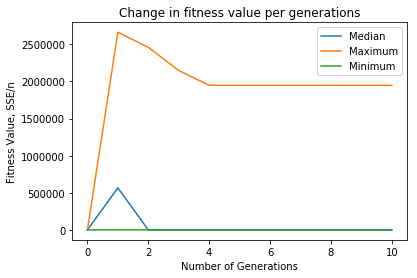

In [10]:
# only the lines that are different than the previous code are commented
current_pop = A()
new_population = np.zeros((num_survivors * 5, chromosome_length))


median_error = [0] # open an array to store median of fitness value
max_error = [0] # open an array to store maximum fitness value
min_error = [0] # open an array to store minimum fitness value
# put the first element of the array as 0, so that the values for first 
# generation would store in the index no 1

# main loop
for i in range(num_generations):
    fitness_vector = C()
    
    # appending the median, minimum and maximum of our fitness values in
    # the respective arrays
    median_error.append(np.median(fitness_vector[:,1]))
    max_error.append(max(fitness_vector[:,1]))
    min_error.append(min(fitness_vector[:,1]))
    
    survivors = np.zeros((num_survivors, chromosome_length))
    for n in range(len(survivors)):
        survivors[n] = D()
    new_population[:len(survivors)] = survivors
    new_population[len(survivors):] = E()
    
    new_population = F(new_population)
    
    current_pop = new_population
    new_population = np.zeros((num_survivors * 5, chromosome_length))

fitness_vector = C()
best_solution = current_pop[np.argmin(fitness_vector[:,1])]
print("The best solution is", best_solution)
print("with error equal to approximately", B(best_solution))

#plotting the min, max and median fitness value for each generation
plt.plot(median_error[:], label='Median') #plotting and labelling the median
plt.plot(max_error[:], label='Maximum') #plotting and labelling the maximum
plt.plot(min_error[:], label='Minimum') #plotting and labelling the minimum
plt.legend() #printing the legends
#labelling y and x axis
plt.xlabel('Number of Generations') 
plt.ylabel('Fitness Value, SSE/n')
plt.title("Change in fitness value per generations") #title
plt.show()

### <i>Interpretation</i>

I generated three empty array to store the median, minimum and maximum of all fitness values (in this case, error) for every generation. I set the value of index 0 as 0, so that the values for first generation would store in the index 0 and it become easier to plot according to the generation.

Inside the main loop, after calculating all the fitness values, I determined the median, minumum and maximum of them and appended them in the respective array. After completing all the loop, I plotted three of them in a same graph as a function of generation with necessary legends and labels.

From the graph, we can see that the maximum and median both goes very high for the first generation. But from the 2nd generation the medium become almost same as the minimum value, between 25-35 and their value never changes further. While, maximum value changes two more time and stop changing after 4th generation. The reason for huge fluctuation in the first generation happened possibly due to the random selection from a large population without considering any fitness function. Later it comes down, but the stability after 4th times maybe a cause of weak algorithm structure. If we can make the algorithm more effeciently, the median will possibly converge or goes very near to 0. 

*____*_*____*_*____*_*____*_*____*_*____* 
<font size=3 >
    $^1$#dataviz: Plotted the graph following the rules of graph plotting with appropriate legends, identified the noticable trends and other parts of the graph and interpret the possible reasons behind this trend.
</font>

<div class='alert alert-block alert-success'>
<b> <font size='6'>Starting of Part 2</font> </b>
</div>

## Part 2: Lotka-Volterra Simulation

In this portion of the assignment, you will produce code that uses Euler’s method to implement a simulation of the solutions of the Lotka-Volterra equations. In addition to providing more practice in Python programming, this project challenges you to understand numerical methods for solving differential equations, which will lead to a deeper understanding of these models.

### 1. Simulation Code [#algorithms, #simulation, #variables, #dataviz]

Write code that inputs the initial ($t=0$) populations for predator and prey, parameter values, desired final output time, and time-step size ($h$), and outputs graphs of both predator and prey populations at each time-step on the same plot; final predicted population sizes for both predator and prey. 

* Write comments for each function you define, specifying inputs and outputs, along with a brief description of what the function does.
* Consider your initial parameter inputs. Explain how the result changes as you vary the initial parameters. Can you find a set of initial parameters that produce stable cyclic population dynamics? Explain the significance of this.

In [11]:
# input parameters of this function are
# x0 = initial prey population
# y0 = initial predator population
# a,b,c,d = Lotka-Volterra parameters: alpha, beta, gamma and delta
# t_out = desired final output time
# h = time-step size
def LV_simulation(x0,y0,a,b,c,d,t_out,h):
    x = x0 # the initial value of x
    y = y0 # the initial value of y
    t = 0 # the starting time
    
    time = [t] # create an array to store all the time-steps
    prey = [x] # create an array to store the prey population in each time-steps
    predator = [y] # create an array to store the predator population in each time-steps
    
    while(t<=t_out): # loop until the time reached to the desired final time
        
        # I take the formula generated in class 7.1 combining the Lotka-Volteraa model and Euler method
        # The three formula that I used are given below of this code as an image
        # calculate the new value of t based on its previous value
        t = t + h 
        # calculate the new value of x based on its previous value
        x = x + h*(a*x-b*x*y)
        # calculate the new value of y based on its previous value
        y = y + h*(d*x*y-c*y)
        
        time.append(t) # appending the current value of t in the time array
        prey.append(x) # appending the current value of prey population in prey array
        predator.append(y) # appending the current value of predator population 
    
    # creating a line graph of prey population vs timesteps and labelling it as 'Prey'
    plt.plot(time,prey, label='Prey')
    # creating a graph of predator population vs timesteps and labelling it as 'Prey'
    plt.plot(time,predator, label='Predator')
    
    plt.xlabel('Time(unit)') #labelling the x axis
    plt.ylabel('Population(unit)') #labelling the y axis
    plt.legend() #showing the legends
    plt.title('Predator-prey population graph') # give a title 
    plt.show() #showing the plot
    
    # returning the final population of prey and predator population
    print('(Prey,Predator):')
    return (x,y)


### <i>Used Formula</i>

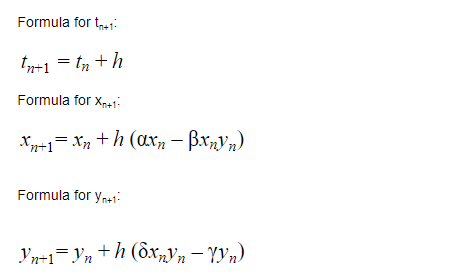

In [12]:
from IPython.display import Image

Image("LV formula.png")

### <i>Running the simulation:</i>

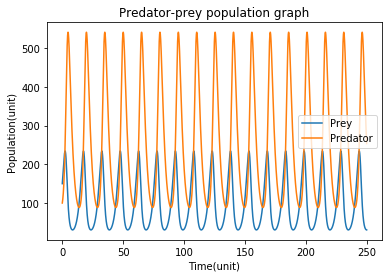

(Prey,Predator):


(30.629071292611652, 253.56896515967222)

In [13]:
LV_simulation(150,100,0.5,0.002,0.4,0.004,250,0.01)
#parameters taken from http://www.math.utah.edu/~davis/1180FILES/lab2.pdf

### <i>Description and Parameter Values</i>

The function takes the initial prey and predator population, parameters of Lotka-Volterra Model, step size and the final output time. Applying Euler's method in the Lotka-Volterra model, it calculates the value of the next time steps and the population of the prey and predator on each time steps from the previous value of them. It iterates again and again until it reaches to the desired final time and finally outputs the prey and predator population on that time. It also saves the value of these three variables for each timesteps to plot a graph showing their change in population through time.

Any change in the initial value of the 4 parameters of the function can change the population change drastically. But generally we can get a stable cyclic population when the $\alpha$ and $\gamma$ are in $10$$^-$$^1$ magnitude and the $\beta$ and $\delta$ are in the magnitude of $10$$^-$$^3$. A smaller time step gives a more smooth graph as the discrete points are more closely to each other.

### 2. Simulation Analysis [#simulation, #modeling]: 

Write a 500-word paper analyzing this simulation and comparing/contrasting it with the NetLogo Wolf Sheep Predation model from class. Address the following points in your write-up:

a) Are there any differences between the assumptions of the Lotka-Volterra model and the assumptions of your simulation? For example, consider whether the model and simulation are continuous or discrete.

b) How does your simulation contrast with an analytical approach to deriving the implications of the Lotka-Volterra model?

c) Compare and contrast your simulation with the NetLogo Wolf Sheep Predation simulation.

* Is each simulation stochastic or deterministic?
* Do they have differing assumptions?
* Do they give differing results?
* Which of them seems to be a more realistic representation of nature? Why?


### <i>Analysis:</i>

a) The main difference between the assumptions of the Lotka-Volterra model and this simulation is the solution approach. The Lotka-Volterra model use a differential equation which can be solved analytically and we can determine the prey and predator population as a constant function of time. So it is possible to know the value of them at any given time, which makes the model continuous.

But this simulation use Euler's method and compute result numerically. We only have some specific data pairs but not any constant function. We knows the approximate value of the prey and predator population for each time steps but not in between any two time steps. So, it is a discrete simulation.

b) An analytical approach would give us two constant functions: the population of prey and predator as a function of time. We could use the function to make a visualization or determine prey or predator population at any given time. We need not to know necessarily the prey and population in the immediately previous time for calculating the current population.

In our simulation, we don’t solve any direct differential equation. We changed it in an algebraic recursive equation and each time calculate a numerical value from each equation. As we are using a numerical approach in the simulation, we cannot determine their population at any given time. It doesn’t give us any formula. It only gives a list of prey and predator population in different time steps. Here the further we go from the initial time, our approximation of population accumulates more error in calculation. If we want to approximate the population at a far distant than the initial time, we need to calculate populations of each of the previous time steps first.

c) Though we used an numerical approach, we used a mathematical formula. So as long as the inputs are the same, the output will be always the same. It doesn’t have any random portion So, it is a deterministic simulation. But the NetLogo simulation uses a random function to determine the movement of the sheep and wolf, so every time we run the simulation, it gives slightly different value, which makes it a stochastic simulation.

In our simulation, we usethese simulations of the Lotka-Volterra model (M. Beals et al, 1999):
- The prey population always have ample food
- Environment stays the same all the time
- Predators always have an appetite for prey.
- The food of predator totally depends on the prey population.
- Population changes at a rate proportional to their size

Whereas the assumptions for the NetLogo model (not including grass behavior) are similar for the first three. But they differ in the assumptions for population increase or death. NetLogo model assumes: 
- Wolve lose energy at each time steps and each movement. But they can live as long as they are eating sheep in each step.
- Wolf and sheep have a fixed probability of reproducing at each time step. 

So, though the first three assumptions are similar, the assumption for population increase or death is different in two models. But the wolf-sheep-grass version differs in the first assumptions too. (Wilensky, 1997)
 

They give a slightly different result but the difference is hard to specify as I do not have many testcases for my simulation. For optimum parameter value, my simulation can result in periodic stable predator-prey population. But the NetLogo version without grass never stays stable. Only the wolf-sheep-grass model becomes stable for some specific parameter values.

Though both of them represents the system very differently according to their assumptions and approach, in my opinion, the NetLogo model seems to be more representative of nature. It assumes that the interaction and movement among the sheep-wolf happen randomly which is more realistic.


### 3. Optional [#simulation, #modeling]: 

In the following resource, read the back story on slide 3 and the explanation provided on slide 14. Then, modify your code above to examine the explanation given for why the number of predatory fishes increased after WWI. How do your simulated results compare to the analytical explanation? 

Sternberg, S. (2009). Lecture 15 Lotka-Volterra. Retrieved from http://www.math.harvard.edu/library/sternberg/slides/11809LV.pdf.


In [14]:
# only the lines that are different than the previous code are commented
# takes another two parameter, k and m as described in harvard slides
# k = the amount of increse in the parameter for growth population of prey
# new growth parameter for prey = a + k
# m = the amount of decrease in the parameter for death population of predator
# new death parameter for predator = c - m
def LV_simulation_WWII(x0,y0,a,b,c,d,k,m,t_out,h):
    x = x0
    y = y0
    t = 0
    
    time = [t]
    prey = [x]
    predator = [y]
    
    while(t<=t_out):
        t = t + h
        # change in growth parameter,
        # a = a' - k [a' = withut fishing]
        # so, a'x = ax + kx
        x = x + h*(a*x+k*x-b*x*y) 
        # change in death parameter,
        # c = c' + m [c' = without fishing]
        # so, c'y = cy + my
        y = y + h*(d*x*y-c*y-m*y)
        
        time.append(t)
        prey.append(x)
        predator.append(y)
        
    plt.plot(time,prey, label='Prey')
    plt.plot(time,predator, label='Predator')
    plt.xlabel('Time(unit)')
    plt.ylabel('Population(unit)')
    plt.legend()
    plt.title('Predator-prey population graph')
    plt.show()
    
    print('(Prey,Predator):')
    return (x,y)
# Add more cells (code or markdown) as needed
# Add more cells (code or markdown) as needed

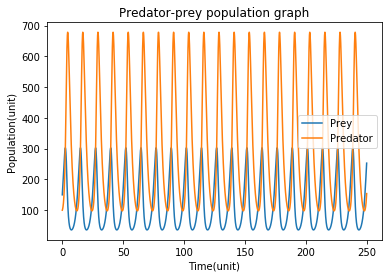

(Prey,Predator):


(252.90292175583662, 153.9553093875682)

In [15]:
LV_simulation_WWII(150,100,0.5,0.002,0.4,0.004,0.1,0.1,250,0.01)

### <i>Analysis:</i>

According to the slide, in normal condition fishing decrease the growth rate of the prey a significant amount, k. If the growth rate without fishing is a', then with fishing it will be, a = a' - k.
Similarly, due to the less amount of prey available, in normal condition the predator has less food and their death rate increase at a rate, m. If the death rate without fishing is c', then with fishing it will be, c = c' + m.

So, when there is no fishing, the amount of prey become more available and thus there is more food for predator, which decreases the death rate of predator. So, there is a significant increase of predator population.

This explanation is supported by my simulation, where I just added the extra parameters, k and m in the formula. As a result of no fishing the predator population goes as high as 700 with the same parameter used in the previous simulation. While we have seen in the previous simulation, for normal condition the predator population cannot go higher than 500 for this sets of parameters.

<div class='alert alert-block alert-success'>
<b> <font size='6'>Reflection</font> </b>
</div>

Describe how you obtained the knowledge to complete the assignment, being sure to include attributions to specific individuals or groups who helped you and how they helped. You should elaborate on any strategies you used to assess your own understanding of the material. [#selfawareness] (<100 words)

I used the readings from both session 5.2 and 7.1 to understand the concepts more. Specially for the genetic algorithm I read from the tutorials point and for Lotka-Volterra I used the wikipedia readings. I cited the sources where I found the assumptions of Lotka-Volterra and NetLogo model. I used the parameters of my simulation found in a reading of Utah University. I used a css code found in stackoverflow (Aquagremlin, 2015) to change the fontcolor, size and some style of the notebook.

## Reference

Aquagremlin. (2015). How to change the font size and color of markdown cell in Ipython (py 2.7) notebook. Retrieved from https://stackoverflow.com/questions/34303422/how-to-change-the-font-size-and-color-of-markdown-cell-in-ipython-py-2-7-noteb

Lotka–Volterra equations. (n.d.). In Wikipedia, The Free Encyclopedia. Retrieved from https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

Math 1180 - Mathematics for Life Scientists. (2017). Retrieved from http://www.math.utah.edu/~davis/1180FILES/lab2.pdf

M. Beals, L. Gross, & S. Harrell. (1999). Predator-prey Dynamics: Lotka-Volterra. Retrieved from http://www.tiem.utk.edu/~gross/bioed/bealsmodules/predator-prey.html

TutorialsPoint. (2017). Genetic Algorithms. Retrieved from https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_introduction.htm

Wilensky, U. (1997). NetLogo Models Library: Wolf Sheep Predation. Retrieved from http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation


In [16]:
#CSS code for changing some style of notebook
from IPython.core.display import HTML
HTML(""" 
<style>

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Tune the space for the subtitle too */
margin-top:0.5em;
margin-bottom: 0.5em;
}

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")